In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers,optimizers,losses
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

In [2]:
data=pd.read_csv("CarPrice_Assignment.csv")

In [6]:
data.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.shape

(205, 26)

In [4]:
data.info

<bound method DataFrame.info of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible   

In [5]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [8]:
X.drop(X.select_dtypes(include='object'),axis=1,inplace=True)

In [9]:
print(f"Shape of input ==> X :{X.shape}\nShape of output ==> Y :{y.shape} ")

Shape of input ==> X :(205, 15)
Shape of output ==> Y :(205,) 


In [10]:
X_train=X.sample(frac=0.7, replace=True, random_state=1,axis=0)
y_train=y.sample(frac=0.7, replace=True, random_state=1,axis=0)

In [11]:
X_test=X.sample(frac=0.3, replace=True, random_state=1,axis=0)
y_test=y.sample(frac=0.3, replace=True, random_state=1,axis=0)

In [12]:
print(f"shape of training data is :{X_train.shape}\nshape of training label is :{y_train.shape}\nshape of testing data is :{X_test.shape}\nshape of testing label is :{y_test.shape}")

shape of training data is :(144, 15)
shape of training label is :(144,)
shape of testing data is :(62, 15)
shape of testing label is :(62,)


In [13]:
X_train=np.asarray(X_train).astype("float32")
X_test=np.asarray(X_test).astype("float32")

In [14]:
mean = X_train.mean(axis=0)
X_train-= mean
std = X_train.std(axis=0)
X_train/= std
X_test-= mean
X_test/= std

In [15]:
y_mean = y_train.mean(axis=0)
y_train-= y_mean
y_std = y_train.std(axis=0)
y_train/= y_std
y_test-= y_mean
y_test/= y_std

In [16]:
val_x=X_train[:50]
partial_x_train=X_train[50:]
val_y=y_train[:50]
partial_y_train=y_train[50:]

In [23]:
network=models.Sequential()
network.add(layers.Dense(10,activation="relu" ,input_shape=(X_train.shape[1],)))
network.add(layers.Dropout(0.2))
network.add(layers.Dense(8,activation="relu"))
network.add(layers.Dense(6,activation="relu"))
network.add(layers.Dense(1))
network.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])

In [24]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [25]:
history=network.fit(partial_x_train, partial_y_train,epochs=100, batch_size=1, verbose=1,validation_data=(val_x,val_y))

Epoch 1/100
94/94 [==============================] - 2s 9ms/step - loss: 0.6399 - mae: 0.5799 - val_loss: 1.1357 - val_mae: 0.6711
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3358 - mae: 0.3845 - val_loss: 1.0034 - val_mae: 0.6187
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.2506 - mae: 0.3104 - val_loss: 0.9213 - val_mae: 0.6029
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6758 - mae: 0.4846 - val_loss: 0.8622 - val_mae: 0.5921
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6082 - mae: 0.4999 - val_loss: 0.7886 - val_mae: 0.5553
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3851 - mae: 0.3763 - val_loss: 0.7386 - val_mae: 0.5308
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5937 - mae: 0.4289 - val_loss: 0.6909 - val_mae: 0.5138
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5878 - m

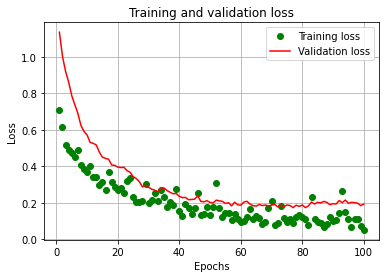

In [26]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss,"go",label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [27]:
network.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.1660 - mae: 0.2693


[0.1660327911376953, 0.2693166136741638]

In [28]:
result_1=network.predict(X_test)
result_1[4]

array([1.0152187], dtype=float32)

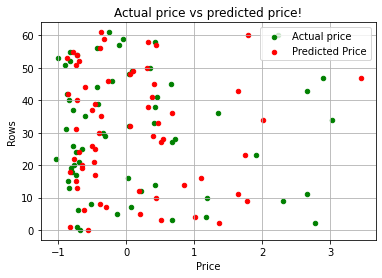

In [36]:
y=result_1
y1=range(62)
x=y_test
plt.scatter(x, y1, label= "Actual price", color= "green", marker= ".", s=80)
plt.scatter(y, y1, label= "Predicted Price", color= "red", marker= ".", s=80)
plt.xlabel('Price')
plt.ylabel('Rows')
plt.title('Actual price vs predicted price!')
plt.legend()
plt.grid()
plt.show()